In [249]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from prettytable import PrettyTable
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [250]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00639/Maternal%20Health%20Risk%20Data%20Set.csv")

- ***Preprocessing***

In [251]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

دنبال داده ای می گردیم که مقدار نداشته باشد، همانطور که مشخص است این دیتاست 
فاقد چنین داده ای است

In [252]:
#Deleting duplicated values
df.drop_duplicates()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,mid risk
674,15,100,60,6.0,98.0,80,low risk
703,15,100,49,7.6,98.0,77,low risk
704,12,100,50,6.0,98.0,70,mid risk


In [253]:
label_enc = preprocessing.LabelEncoder()
df["RiskLevel"] = label_enc.fit_transform(df["RiskLevel"])
y = df["RiskLevel"]
X = df.drop("RiskLevel", 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 102,test_size = 0.3)
X_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
532,49,140,90,15.0,98.0,90
156,28,120,90,7.5,98.0,70
638,29,90,70,11.0,100.0,80
699,34,120,75,8.0,98.0,70
127,55,140,95,19.0,98.0,77


In [254]:
#Normalization; all values in range 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.65      , 0.77777778, 0.80392157, 0.69230769, 0.        ,
        1.        ],
       [0.3       , 0.55555556, 0.80392157, 0.11538462, 0.        ,
        0.75903614],
       [0.31666667, 0.22222222, 0.41176471, 0.38461538, 0.4       ,
        0.87951807],
       ...,
       [0.21666667, 0.33333333, 0.70588235, 0.11538462, 0.        ,
        0.71084337],
       [0.56666667, 0.55555556, 0.80392157, 0.76923077, 0.        ,
        0.87951807],
       [0.41666667, 0.55555556, 0.60784314, 0.06923077, 0.        ,
        0.87951807]])

In [255]:
#Decision Tree

tbl = PrettyTable(["Max Depth", "Accuracy", "Cross Validation"])
print('Best max depth value: ')

#This for loop finds the best value for the hyperparamether(max_depth)
for i in range (20, 100):
    dtc = DecisionTreeClassifier(max_depth = i)
    dtc = dtc.fit(X_train, y_train)
    dtc_pred = dtc.predict(X_test)
    dtc_acc = accuracy_score(dtc_pred, y_test)
    dtc_scores = cross_val_score(dtc, X_train, y_train, cv=5)
    tbl.add_row([i, dtc_acc, dtc_scores.mean()])
print(tbl)
tbl.clear()

Best max depth value: 
+-----------+--------------------+--------------------+
| Max Depth |      Accuracy      |  Cross Validation  |
+-----------+--------------------+--------------------+
|     20    | 0.8491803278688524 | 0.7996803516132255 |
|     21    | 0.8590163934426229 | 0.7968534611926881 |
|     22    | 0.8491803278688524 | 0.7982818899210868 |
|     23    | 0.8491803278688524 | 0.8010888023174507 |
|     24    | 0.8524590163934426 | 0.7968634502047748 |
|     25    | 0.8524590163934426 | 0.8053341324543004 |
|     26    | 0.8524590163934426 | 0.7996803516132254 |
|     27    | 0.8524590163934426 | 0.8025072420337629 |
|     28    | 0.8524590163934426 | 0.805344121466387  |
|     29    | 0.8524590163934426 | 0.8010987913295373 |
|     30    | 0.8524590163934426 | 0.7968534611926881 |
|     31    | 0.8524590163934426 | 0.8025072420337629 |
|     32    | 0.8491803278688524 | 0.7996603735890521 |
|     33    | 0.8491803278688524 | 0.7996803516132254 |
|     34    | 0.845901639

In [256]:
tbl = PrettyTable(["Min Samples Split", "Accuracy", "Cross Validation"])
print('Best min sample split value: ')

#This for loop finds the best value for the hyperparamether(min_samples_split)
for i in range (2, 30):
    dtc = DecisionTreeClassifier(max_depth = 60, min_samples_split = i)
    dtc = dtc.fit(X_train, y_train)
    dtc_pred = dtc.predict(X_test)
    dtc_acc = accuracy_score(dtc_pred, y_test)
    dtc_scores = cross_val_score(dtc, X_train, y_train, cv=5)
    tbl.add_row([i, dtc_acc, dtc_scores.mean()])
print(tbl)
tbl.clear()

Best min sample split value: 
+-------------------+--------------------+--------------------+
| Min Samples Split |      Accuracy      |  Cross Validation  |
+-------------------+--------------------+--------------------+
|         2         | 0.8459016393442623 | 0.8010987913295373 |
|         3         | 0.8426229508196721 | 0.7940465487963241 |
|         4         | 0.8032786885245902 | 0.7869843172510238 |
|         5         | 0.8065573770491803 | 0.7728998102087703 |
|         6         | 0.8098360655737705 | 0.7686744580960942 |
|         7         | 0.8065573770491803 | 0.7672460293676956 |
|         8         | 0.8163934426229508 | 0.7630206772550195 |
|         9         | 0.8032786885245902 | 0.7588053141544301 |
|         10        | 0.7967213114754098 | 0.7573469183897712 |
|         11        | 0.8032786885245902 | 0.7517031265607831 |
|         12        | 0.7868852459016393 | 0.746059334731795  |
|         13        | 0.7836065573770492 | 0.7446608730396564 |
|         

In [257]:
tbl = PrettyTable(["Min Samples Leaf", "Accuracy", "Cross Validation"])
print('Best min samples leaf value: ')

#This for loop finds the best value for the hyperparamether(min_samples_leaf)
for i in range(1, 20):
    dtc = DecisionTreeClassifier(max_depth = 60, min_samples_split = 2, min_samples_leaf = i)
    dtc = dtc.fit(X_train, y_train)
    dtc_pred = dtc.predict(X_test)
    dtc_acc = accuracy_score(dtc_pred, y_test)
    dtc_scores = cross_val_score(dtc, X_train, y_train, cv=5)
    tbl.add_row([i, dtc_acc, dtc_scores.mean()])
print(tbl)
tbl.clear()

Best min samples leaf value: 
+------------------+--------------------+--------------------+
| Min Samples Leaf |      Accuracy      |  Cross Validation  |
+------------------+--------------------+--------------------+
|        1         | 0.8524590163934426 | 0.8010688242932774 |
|        2         | 0.7573770491803279 | 0.7503046648686446 |
|        3         | 0.7475409836065574 | 0.7531215662770951 |
|        4         | 0.8163934426229508 | 0.7221356507841376 |
|        5         | 0.7967213114754098 | 0.7136449905104385 |
|        6         | 0.8032786885245902 | 0.698142043751873  |
|        7         | 0.8032786885245902 | 0.7051842972729997 |
|        8         | 0.7868852459016393 | 0.6981220657276995 |
|        9         | 0.780327868852459  | 0.6896713615023473 |
|        10        | 0.7737704918032787 | 0.6910498451703126 |
|        11        | 0.7508196721311475 | 0.6783837778443712 |
|        12        | 0.7672131147540984 | 0.6868644491059834 |
|        13        | 0.76

In [ ]:
#Set all hyperparamethers
dtc = DecisionTreeClassifier(max_depth = 60, min_samples_split = 2, min_samples_leaf = 1)
dtc = dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

res = PrettyTable(["Accuracy of train data", "Accuracy of test data" ,"Cross Validation"])
dtc_acc_test = accuracy_score(dtc_pred, y_test)
dtc_acc_train = dtc.score(X_train, y_train)
dtc_scores = cross_val_score(dtc, X_train, y_train, cv=5)
res.add_row([dtc_acc_train, dtc_acc_test, dtc_scores.mean()])
print(res)
res.clear()

cm = confusion_matrix(y_test, dtc_pred)
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= dtc.classes_).plot()

آنچه به نظر می رسد این است که درستی داده های آموزش داده شده حدود 92 درصد است و داده های تست شده حدود 85 درصد. همچنین کراس ولیدیشن نشان می دهد که حدود 80 درصد می توان به نتیجه مدل اطمینان کرد. همانطور که از نمودار مشخص است از کل تعداد داده ها حدود 79تا به درستی 0 پیش بینی شده اند، 3 تا 1 بوده ولی 0 پیش بینی شده است و 4 تا داده 2 بوده ولی 0 پیش بینی شده است. همچنین از ردسف دوم برداشت می شود که 97 داده 1 بوده و 1 به درستی پیش بینی شده است، 13 داده 2 بوده و 1 داده 0 بوده ولی به اشتباه 1 پیش بینی شده است در رابطه با ستون سوم هم مشخص است که 84 داده به درستی 2 پیش بیبی شده اند ولی 19 داده به نادرستی 1 و 5 داده به ناردستی 0 پیش بینی شده اند. میتوان از این شکل نتیجه گرفت این مدل 92 درصد 0 را پیش بینی می کند، 87 درصد داده 1 و 77 درصد داده 2 را می تواند پیش بینی کند 

In [ ]:
# KNN

tbl = PrettyTable(["Leaf Size", "Accuracy", "Cross Validation"])
print('Best leaf size value: ')

for i in range(1, 50):
    knc = KNeighborsClassifier(leaf_size = i)
    knc = knc.fit(X_train, y_train)
    knc_pred = knc.predict(X_test)
    knc_scores = cross_val_score(knc, X_train, y_train, cv=5)
    knc_acc = accuracy_score(knc_pred, y_test)
    tbl.add_row([i, knc_acc, knc_scores.mean()])
print(tbl)
tbl.clear()

In [ ]:
tbl = PrettyTable(["n_neighbors", "Accuracy", "Cross Validation"])
print('Best n_neighbors value: ')

for i in range(1, 20):
    knc = KNeighborsClassifier(leaf_size = 50, n_neighbors = i)
    knc = knc.fit(X_train, y_train)
    knc_pred = knc.predict(X_test)
    knc_scores = cross_val_score(knc, X_train, y_train, cv=5)
    knc_acc = accuracy_score(knc_pred, y_test)
    tbl.add_row([i, knc_acc, knc_scores.mean()])
print(tbl)
tbl.clear()

In [ ]:
knc = KNeighborsClassifier(leaf_size = 50, n_neighbors = 1)
knc = knc.fit(X_train, y_train)
knc_pred = knc.predict(X_test)

res = PrettyTable(["Accuracy of train data", "Accuracy of test data" ,"Cross Validation"])
knc_acc_test = accuracy_score(knc_pred, y_test)
knc_acc_train = knc.score(X_train, y_train)
knc_scores = cross_val_score(knc, X_train, y_train, cv=5)
res.add_row([knc_acc_train, knc_acc_test, knc_scores.mean()])
print(res)
res.clear()

cm = confusion_matrix(y_test, knc_pred)
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= knc.classes_).plot()

آنچه به نظر می رسد این است که درستی داده های آموزش داده شده حدود 90 درصد است و داده های تست شده حدود 83 درصد. همچنین کراس ولیدیشن نشان می دهد که حدود 77 درصد می توان به نتیجه مدل اطمینان کرد. همانطور که از نمودار مشخص است از کل تعداد داده ها حدود 70 به درستی 0 پیش بینی شده اند. همچنین از ردیف دوم برداشت می شود که 97 داده 1 بوده و 1 به درستی پیش بینی شده است. در رابطه با ستون سوم هم مشخص است که 86 داده به درستی 2 پیش بیبی شده اند.

In [ ]:
# SVM

tbl = PrettyTable(["C", "Accuracy", "Cross Validation"])
print('Best C value: ')

for i in range(50, 100):
    svc = SVC(C=i)
    svc = svc.fit(X_train, y_train)
    svc_pred = svc.predict(X_test)
    svc_acc = accuracy_score(svc_pred, y_test)
    svc_scores = cross_val_score(svc, X_train, y_train, cv=5)
    tbl.add_row([i, svc_acc, svc_scores.mean()])
print(tbl)
tbl.clear()
confusion_matrix(y_test, svc_pred)

In [ ]:
tbl = PrettyTable(['gamma', "Accuracy", "Cross Validation"])
print('Best gamma value: ')

for i in range(1 , 30):
    svc = SVC(C = 80, gamma = i)
    svc = svc.fit(X_train, y_train)
    svc_pred = svc.predict(X_test)
    svc_acc = accuracy_score(svc_pred, y_test)
    svc_scores = cross_val_score(svc, X_train, y_train, cv=5)
    tbl.add_row([i, svc_acc, svc_scores.mean()])
print(tbl)
tbl.clear()

In [ ]:
svc = SVC(C = 80, gamma = 25)
svc = svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

res = PrettyTable(["Accuracy of train data", "Accuracy of test data" ,"Cross Validation"])
svc_acc_test = accuracy_score(svc_pred, y_test)
svc_acc_train = svc.score(X_train, y_train)
svc_scores = cross_val_score(svc, X_train, y_train, cv=5)
res.add_row([svc_acc_train, svc_acc_test, svc_scores.mean()])
print(res)
res.clear()

cm = confusion_matrix(y_test, svc_pred)
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= svc.classes_).plot()

آنچه به نظر می رسد این است که درستی داده های آموزش داده شده حدود 88 درصد است و داده های تست شده حدود 80 درصد. همچنین کراس ولیدیشن نشان می دهد که حدود 76 درصد می توان به نتیجه مدل اطمینان کرد. همانطور که از نمودار مشخص است از کل تعداد داده ها حدود 78 به درستی 0 پیش بینی شده اند. همچنین از ردیف دوم برداشت می شود که 96 داده 1 بوده و 1 به درستی پیش بینی شده است. در رابطه با ستون سوم هم مشخص است که 71 داده به درستی 2 پیش بیبی شده اند.

In [ ]:
# Random Forest

tbl = PrettyTable(["n_jobs", "Accuracy", "Cross Validation"])
print('Best n_jobs value: ')

for i in range(-10, 0):
    rfc = RandomForestClassifier(n_jobs = i)
    rfc = rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    rfc_acc = accuracy_score(rfc_pred, y_test)
    rfc_scores = cross_val_score(rfc, X_train, y_train, cv=5)
    tbl.add_row([i, rfc_acc, rfc_scores.mean()])
print(tbl)
tbl.clear()

In [ ]:
tbl = PrettyTable(["n_estimators", "Accuracy", "Cross Validation"])
print('Best n_estimators value: ')
for i in range(1, 40):
    rfc = RandomForestClassifier(n_jobs = -1, n_estimators = i)
    rfc = rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    rfc_acc = accuracy_score(rfc_pred, y_test)
    rfc_scores = cross_val_score(rfc, X_train, y_train, cv=5)
    tbl.add_row([i, rfc_acc, rfc_scores.mean()])
print(tbl)
tbl.clear()

+------------------------+-----------------------+--------------------+
| Accuracy of train data | Accuracy of test data |  Cross Validation  |
+------------------------+-----------------------+--------------------+
|    0.92524682651622    |   0.8557377049180328  | 0.8081210668264909 |
+------------------------+-----------------------+--------------------+
[[ 75   1   9]
 [  3 100  16]
 [  2  13  86]]


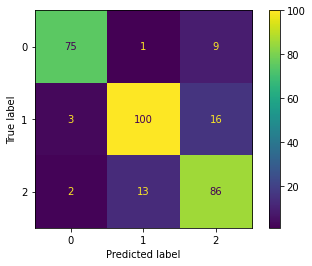

In [264]:
rfc = RandomForestClassifier(n_jobs = -1, n_estimators = 20)
rfc = rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

res = PrettyTable(["Accuracy of train data", "Accuracy of test data" ,"Cross Validation"])
rfc_acc_test = accuracy_score(rfc_pred, y_test)
rfc_acc_train = rfc.score(X_train, y_train)
rfc_scores = cross_val_score(rfc, X_train, y_train, cv=5)
res.add_row([rfc_acc_train, rfc_acc_test, rfc_scores.mean()])
print(res)
res.clear()

cm = confusion_matrix(y_test, rfc_pred)
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= rfc.classes_).plot()

آنچه به نظر می رسد این است که درستی داده های آموزش داده شده حدود 92.5 درصد است و داده های تست شده حدود 85 درصد. همچنین کراس ولیدیشن نشان می دهد که حدود 80 درصد می توان به نتیجه مدل اطمینان کرد. همانطور که از نمودار مشخص است از کل تعداد داده ها حدود 75 به درستی 0 پیش بینی شده اند. همچنین از ردیف دوم برداشت می شود که 100 داده 1 بوده و 1 به درستی پیش بینی شده است. در رابطه با ستون سوم هم مشخص است که 86 داده به درستی 2 پیش بیبی شده اند.

In [266]:
res = PrettyTable(["Model" ,"Accuracy of train data", "Accuracy of test data" ,"Cross Validation"])
res.add_row(['Random Forest', rfc_acc_train, rfc_acc_test, rfc_scores.mean()])
res.add_row(['Decesion tree', dtc_acc_train, dtc_acc_test, dtc_scores.mean()])
res.add_row(['KNN', knc_acc_train, knc_acc_test, knc_scores.mean()])
res.add_row(['SVM', svc_acc_train, svc_acc_test, svc_scores.mean()])
print(res)


+---------------+------------------------+-----------------------+--------------------+
|     Model     | Accuracy of train data | Accuracy of test data |  Cross Validation  |
+---------------+------------------------+-----------------------+--------------------+
| Random Forest |    0.92524682651622    |   0.8557377049180328  | 0.8081210668264909 |
| Decesion tree |    0.92524682651622    |   0.8524590163934426  | 0.7982619118969134 |
|      KNN      |   0.9040902679830748   |   0.8295081967213115  | 0.7728898211966836 |
|      SVM      |   0.8871650211565585   |   0.8032786885245902  | 0.7671860952951752 |
+---------------+------------------------+-----------------------+--------------------+


به نظر می آید بهترین مدل برای توصیف این دادگان رندوم فارست است چراکه داده ها را بهتر و دقیق تر پیش بینی می کند.